In [97]:
%load_ext autoreload
%autoreload 2

import numpy as np
from coupling_dynamics import henon_system2, henon_system3, rossler_system_1, lorenz_system_1
import ordpy
from ordpy import maximum_complexity_entropy, minimum_complexity_entropy


import matplotlib.pyplot as plt 
plt.style.use('dark_background')
# Just like the Simulations! https://star-wars-memes.fandom.com/wiki/Just_like_the_simulations!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
hc_min_curve = minimum_complexity_entropy(dx=5, dy=1, size=200).T
hc_max_curve = maximum_complexity_entropy(dx=5, dy=1, m=4).T
hmin, cmin = hc_min_curve  
hmax, cmax = hc_max_curve
T_max = 10000
window_size = 250
windows = []
for i in range(0, T_max, window_size):
	windows.append((i, i + window_size))
print(len(windows))

40


### Henon System

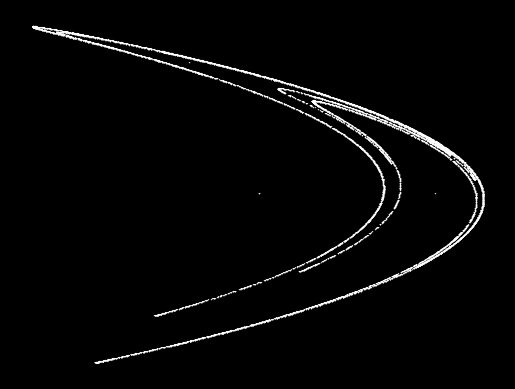

In [142]:
x0 = np.array([0, 0])
x, y = henon_system2(x0, T_max)
# plot figure
plt.plot(x, y, '^', color='white', alpha = 0.8, markersize=0.3)
plt.axis('off')
plt.show()
plt.close()
xy_avg = (x + y) / 2

/tmp/ipykernel_61519/2475532648.py:24: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend((upper, lower, x_henon_plot, y_henon_plot, xy_avg_henon_plot), ("Maximum Complexity Entropy", "Minimum Complexity Entropy", "X", "Y", "X, Y Average"), scatterpoints=1)


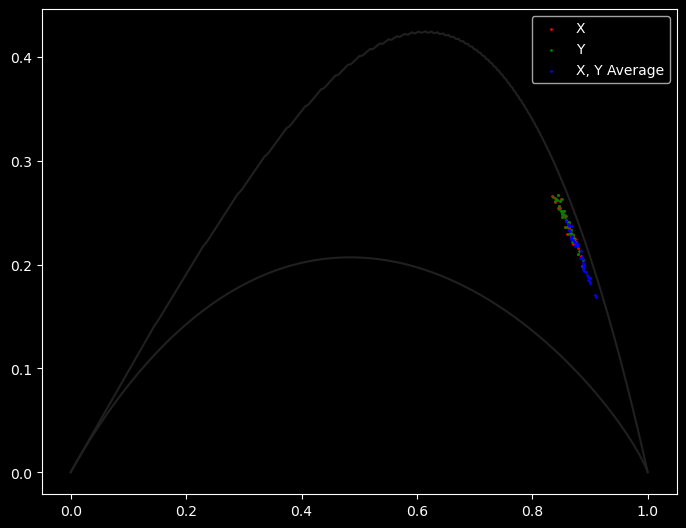

In [143]:
f, ax = plt.subplots(figsize=(8.19, 6.3))

hc_henon_x = np.zeros((len(windows), 2))
hc_henon_y = np.zeros((len(windows), 2))
hc_henon_xy_avg = np.zeros((len(windows), 2))
for idx, (start_idx, end_idx) in enumerate(windows):
	x_entropy, x_complexity = ordpy.complexity_entropy(data=x[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_henon_x[idx][0] = x_entropy
	hc_henon_x[idx][1] = x_complexity

	y_entropy, y_complexity = ordpy.complexity_entropy(data=y[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_henon_y[idx][0] = y_entropy
	hc_henon_y[idx][1] = y_complexity

	xy_entropy, xy_complexity = ordpy.complexity_entropy(data=xy_avg[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_henon_xy_avg[idx][0] = xy_entropy
	hc_henon_xy_avg[idx][1] = xy_complexity

upper = ax.plot(hmin, cmin, linewidth=1.5, color='#202020', zorder=0)
lower = ax.plot(hmax, cmax, linewidth=1.5, color='#202020', zorder=0)
x_henon_plot = ax.scatter(hc_henon_x[:,0], hc_henon_x[:,1], c="r", s=1)
y_henon_plot = ax.scatter(hc_henon_y[:,0], hc_henon_y[:,1], c="g", s=1)
xy_avg_henon_plot = ax.scatter(hc_henon_xy_avg[:,0], hc_henon_xy_avg[:,1], c="b", s=1)
ax.legend((upper, lower, x_henon_plot, y_henon_plot, xy_avg_henon_plot), ("Maximum Complexity Entropy", "Minimum Complexity Entropy", "X", "Y", "X, Y Average"), scatterpoints=1)
plt.show()

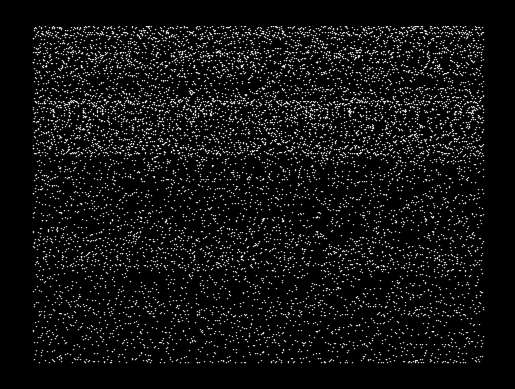

In [144]:
x0 = np.array([0])
x = henon_system3(x0, T_max)
# plot figure
plt.plot(x, '^', color='white', alpha = 0.8, markersize=0.3)
plt.axis('off')
plt.show()
plt.close()

/tmp/ipykernel_61519/3683012348.py:11: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend((upper, lower, henon1d_plot), ("Maximum Complexity Entropy", "Minimum Complexity Entropy", "Henon Points"), scatterpoints=1)


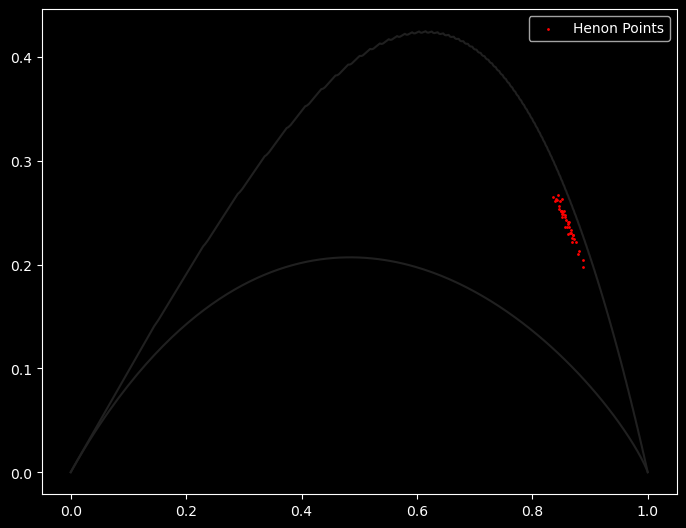

In [145]:
f, ax = plt.subplots(figsize=(8.19, 6.3))
henon1d_x = np.zeros((len(windows), 2))
for idx, (start_idx, end_idx) in enumerate(windows):
	henon1d_entropy, henon1d_complexity = ordpy.complexity_entropy(data=x[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	henon1d_x[idx][0] = henon1d_entropy
	henon1d_x[idx][1] = henon1d_complexity

upper = ax.plot(hmin, cmin, linewidth=1.5, color='#202020', zorder=0)
lower = ax.plot(hmax, cmax, linewidth=1.5, color='#202020', zorder=0)
henon1d_plot = ax.scatter(henon1d_x[:,0], henon1d_x[:,1], c="r", s=1)
ax.legend((upper, lower, henon1d_plot), ("Maximum Complexity Entropy", "Minimum Complexity Entropy", "Henon Points"), scatterpoints=1)
plt.show()

### Rossler System

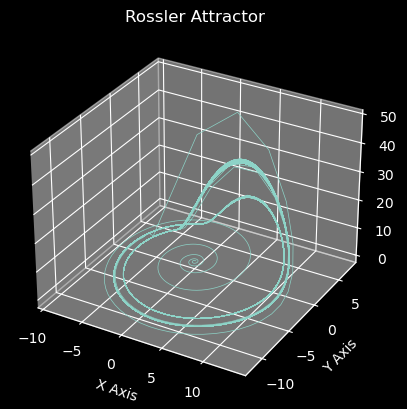

In [148]:
timestep = 0.1 # From https://www.nature.com/articles/s41598-019-45289-7#Sec11
x0 = np.array([0.1, 0.1, 0.1]) 
params = np.array([0.2, 0.2, 5.7]) # From Wikipedia a=0.1, b=0.1, c=14 have been studied too
x, y, z = rossler_system_1(x0, params, 10000, timestep)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Rossler Attractor")

xy_avg = (x + y) / 2
yz_avg = (y + z) / 2
xz_avg = (x + z) / 2
plt.show()

/tmp/ipykernel_61519/1924766704.py:44: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend((upper, lower, x_rossler_plot, y_rossler_plot, z_rossler_plot, xy_avg_rossler_plot, yz_avg_rossler_plot, xz_avg_rossler_plot), ("Maximum Complexity Entropy", "Minimum Complexity Entropy", "X", "Y", "Z", "X, Y Average", "Y, Z Average", "X, Z Average"), scatterpoints=1)


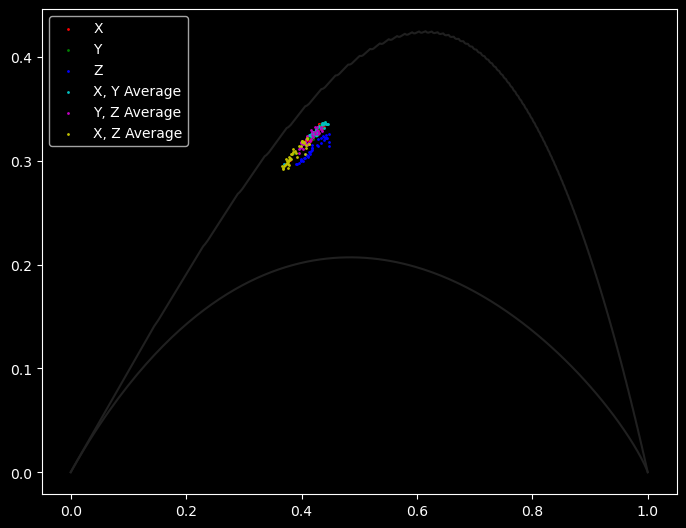

In [149]:
f, ax = plt.subplots(figsize=(8.19, 6.3))

hc_rossler_x = np.zeros((len(windows), 2))
hc_rossler_y = np.zeros((len(windows), 2))
hc_rossler_z = np.zeros((len(windows), 2))
hc_rossler_xy_avg = np.zeros((len(windows), 2))
hc_rossler_yz_avg = np.zeros((len(windows), 2))
hc_rossler_xz_avg = np.zeros((len(windows), 2))

for idx, (start_idx, end_idx) in enumerate(windows):
	x_entropy, x_complexity = ordpy.complexity_entropy(data=x[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_rossler_x[idx][0] = x_entropy
	hc_rossler_x[idx][1] = x_complexity

	y_entropy, y_complexity = ordpy.complexity_entropy(data=y[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_rossler_y[idx][0] = y_entropy
	hc_rossler_y[idx][1] = y_complexity

	z_entropy, z_complexity = ordpy.complexity_entropy(data=z[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_rossler_z[idx][0] = z_entropy
	hc_rossler_z[idx][1] = z_complexity

	xy_avg_entropy, xy_avg_complexity = ordpy.complexity_entropy(data=xy_avg[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_rossler_xy_avg[idx][0] = xy_avg_entropy
	hc_rossler_xy_avg[idx][1] = xy_avg_complexity

	yz_avg_entropy, yz_avg_complexity = ordpy.complexity_entropy(data=yz_avg[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_rossler_yz_avg[idx][0] = yz_avg_entropy
	hc_rossler_yz_avg[idx][1] = yz_avg_complexity

	xz_entropy, xz_complexity = ordpy.complexity_entropy(data=xz_avg[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_rossler_xz_avg[idx][0] = xz_entropy
	hc_rossler_xz_avg[idx][1] = xz_complexity

upper = ax.plot(hmin, cmin, linewidth=1.5, color='#202020', zorder=0)
lower = ax.plot(hmax, cmax, linewidth=1.5, color='#202020', zorder=0)
x_rossler_plot = ax.scatter(hc_rossler_x[:,0], hc_rossler_x[:,1], c="r", s=1)
y_rossler_plot = ax.scatter(hc_rossler_y[:,0], hc_rossler_y[:,1], c="g", s=1)
z_rossler_plot = ax.scatter(hc_rossler_z[:,0], hc_rossler_z[:,1], c="b", s=1)
xy_avg_rossler_plot = ax.scatter(hc_rossler_xy_avg[:,0], hc_rossler_xy_avg[:,1], c="c", s=1)
yz_avg_rossler_plot = ax.scatter(hc_rossler_yz_avg[:,0], hc_rossler_yz_avg[:,1], c="m", s=1)
xz_avg_rossler_plot = ax.scatter(hc_rossler_xz_avg[:,0], hc_rossler_xz_avg[:,1], c="y", s=1)

ax.legend((upper, lower, x_rossler_plot, y_rossler_plot, z_rossler_plot, xy_avg_rossler_plot, yz_avg_rossler_plot, xz_avg_rossler_plot), ("Maximum Complexity Entropy", "Minimum Complexity Entropy", "X", "Y", "Z", "X, Y Average", "Y, Z Average", "X, Z Average"), scatterpoints=1)
plt.show()

### Lorenz System

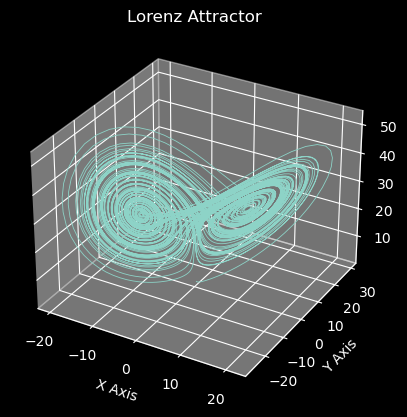

In [150]:
timestep = 0.01 # From https://www.nature.com/articles/s41598-019-45289-7#Sec11
x0 = np.array([0., 1., 1.05]) 
params = np.array([10, 2.667, 28])  # in the order sigma, beta, rho
x, y, z = lorenz_system_1(x0, params, 10000, timestep)

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(x, y, z, lw=0.6)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

/tmp/ipykernel_61519/1304052240.py:44: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend((upper, lower, x_lorenz_plot, y_lorenz_plot, z_lorenz_plot, xy_avg_lorenz_plot, yz_avg_lorenz_plot, xz_avg_lorenz_plot), ("Maximum Complexity Entropy", "Minimum Complexity Entropy", "X", "Y", "Z", "X, Y Average", "Y, Z Average", "X, Z Average"), scatterpoints=1)


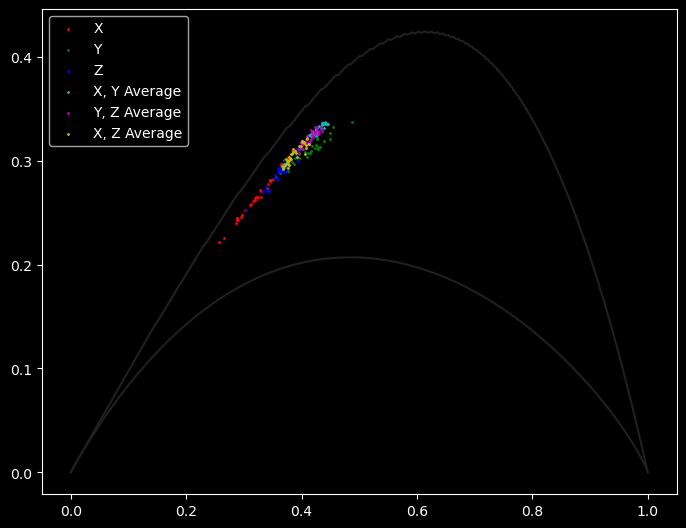

In [151]:
f, ax = plt.subplots(figsize=(8.19, 6.3))

hc_lorenz_x = np.zeros((len(windows), 2))
hc_lorenz_y = np.zeros((len(windows), 2))
hc_lorenz_z = np.zeros((len(windows), 2))
hc_lorenz_xy_avg = np.zeros((len(windows), 2))
hc_lorenz_yz_avg = np.zeros((len(windows), 2))
hc_lorenz_xz_avg = np.zeros((len(windows), 2))

for idx, (start_idx, end_idx) in enumerate(windows):
	x_entropy, x_complexity = ordpy.complexity_entropy(data=x[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_lorenz_x[idx][0] = x_entropy
	hc_lorenz_x[idx][1] = x_complexity

	y_entropy, y_complexity = ordpy.complexity_entropy(data=y[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_lorenz_y[idx][0] = y_entropy
	hc_lorenz_y[idx][1] = y_complexity

	z_entropy, z_complexity = ordpy.complexity_entropy(data=z[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_lorenz_z[idx][0] = z_entropy
	hc_lorenz_z[idx][1] = z_complexity

	xy_avg_entropy, xy_avg_complexity = ordpy.complexity_entropy(data=xy_avg[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_lorenz_xy_avg[idx][0] = xy_avg_entropy
	hc_lorenz_xy_avg[idx][1] = xy_avg_complexity

	yz_avg_entropy, yz_avg_complexity = ordpy.complexity_entropy(data=yz_avg[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_lorenz_yz_avg[idx][0] = yz_avg_entropy
	hc_lorenz_yz_avg[idx][1] = yz_avg_complexity

	xz_entropy, xz_complexity = ordpy.complexity_entropy(data=xz_avg[start_idx:end_idx], dx=int(5), dy=int(1), taux=int(3), tauy=int(1))
	hc_lorenz_xz_avg[idx][0] = xz_entropy
	hc_lorenz_xz_avg[idx][1] = xz_complexity

upper = ax.plot(hmin, cmin, linewidth=1.5, color='#202020', zorder=0)
lower = ax.plot(hmax, cmax, linewidth=1.5, color='#202020', zorder=0)
x_lorenz_plot = ax.scatter(hc_lorenz_x[:,0], hc_lorenz_x[:,1], c="r", s=1)
y_lorenz_plot = ax.scatter(hc_lorenz_y[:,0], hc_lorenz_y[:,1], c="g", s=1)
z_lorenz_plot = ax.scatter(hc_lorenz_z[:,0], hc_lorenz_z[:,1], c="b", s=1)
xy_avg_lorenz_plot = ax.scatter(hc_lorenz_xy_avg[:,0], hc_lorenz_xy_avg[:,1], c="c", s=1)
yz_avg_lorenz_plot = ax.scatter(hc_lorenz_yz_avg[:,0], hc_lorenz_yz_avg[:,1], c="m", s=1)
xz_avg_lorenz_plot = ax.scatter(hc_lorenz_xz_avg[:,0], hc_lorenz_xz_avg[:,1], c="y", s=1)

ax.legend((upper, lower, x_lorenz_plot, y_lorenz_plot, z_lorenz_plot, xy_avg_lorenz_plot, yz_avg_lorenz_plot, xz_avg_lorenz_plot), ("Maximum Complexity Entropy", "Minimum Complexity Entropy", "X", "Y", "Z", "X, Y Average", "Y, Z Average", "X, Z Average"), scatterpoints=1)
plt.show()